# Capítulo 5. Máquinas de Soporte de Vectores


## Máquinas de Soporte de Vectores (SVM) — Qué son y para qué sirven

---

## 1. Clasificación Lineal con SVM
**Qué es:**  
Un modelo de clasificación que busca el hiperplano que mejor separa dos clases, maximizando el margen entre ellas.

**Para qué sirve:**  
- Clasificación binaria cuando los datos son aproximadamente linealmente separables.  
- Modelos robustos frente al sobreajuste, especialmente cuando el número de características es grande.

---

## 2. Clasificador No Lineal con SVM
**Qué es:**  
Una extensión del SVM lineal que permite clasificar datos no linealmente separables mediante el uso de funciones kernel.

**Para qué sirve:**  
- Abordar problemas donde las fronteras de decisión son curvas o complejas.  
- Transformar el espacio original para permitir separar clases que antes no lo eran.

---

### 2.1 Kernel Polinomial
**Qué es:**  
Un kernel que genera combinaciones polinomiales de las características originales para capturar relaciones no lineales.

**Para qué sirve:**  
- Modelar fronteras de decisión curvas con control sobre el grado de flexibilidad.  
- Adecuado cuando se sospechan interacciones polinomiales entre variables.

---

### 2.2 Kernel RBF (Gaussiano)
**Qué es:**  
Un kernel que mide la similitud mediante una función exponencial basada en la distancia entre ejemplos.

**Para qué sirve:**  
- Capturar relaciones no lineales altamente complejas.  
- Crear fronteras suaves y flexibles que se adaptan muy bien a la forma de los datos.  
- Es el kernel más utilizado en la práctica.

---

## 3. Regresión con SVM (SVR)
**Qué es:**  
La versión de SVM para problemas de regresión, buscando ajustar una función que mantenga la mayoría de los puntos dentro de un margen de tolerancia.

**Para qué sirve:**  
- Predecir valores numéricos con modelos robustos a outliers.  
- Ajustar regresiones tanto lineales como no lineales mediante kernels.

---

### 3.1 Regresión Lineal con SVM
**Qué es:**  
Una regresión basada en un SVM lineal, que busca un margen dentro del cual los errores no son penalizados.

**Para qué sirve:**  
- Problemas de regresión lineal donde se desea robustez frente a valores atípicos.  
- Alternativa más resistente que la regresión lineal tradicional.

---

### 3.2 Regresión Polinomial con SVM
**Qué es:**  
Una SVR que utiliza un kernel polinomial para capturar relaciones no lineales.

**Para qué sirve:**  
- Modelar relaciones polinomiales complejas.  
- Ajustar curvas sin necesidad de generar manualmente características polinomiales.



## <span style="color:green">1. Clasificación Lineal con SVM</span>

In [7]:
#Importar las librerias numpy, pandas, matplotlib 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from matplotlib import pyplot

Las máquinas de vectores de soporte depende de que los datos esten bien escalados 

In [2]:
#Importar los datos a necesitar, en este caso, sobre si fueron seleccionados o no para un trabajo. 
#La variable gmat tiene un rango de número más elevado en comparación a las otras variables
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
             'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
             'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
             'admitted': [1,1,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
          }


In [3]:
#Visualiza los datos de trabajo
df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [4]:
#Separar los datos a predictores y los predichos
x = df[['gmat', 'gpa','work_experience']]
y = df['admitted']

In [8]:
#Haz un pipeline para escalar los datos utilizando StandarScaler y un Kernel Lineal
svm = Pipeline([
    ('scaler', StandardScaler()),
    #SVC=Support Vector Classifier
    ('SVC', SVC(kernel='linear', C=1))
])

In [9]:
#Ejecutar el pipeline
svm.fit(x,y)

,steps,"[('scaler', ...), ('SVC', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'


In [10]:
#Haz una predicción de un sujeto aleatorio para ver que todo marche bien 
svm.predict([[720,3.5,4]])

d:\Master IA Ejercicios\scoped_dir1840_160314430\anaconda\envs\tf310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

In [11]:
#Evaluar el clasificador  con una matriz de confusión 
from sklearn.metrics import confusion_matrix, f1_score
y_pred = svm.predict(x)
confusion_matrix(y, y_pred)
#En este caso no hay diferencia

array([[18,  3],
       [ 1, 18]])

In [12]:
#Sacar el f1_score 
f1_score(y_pred,y)

0.9

***

## <span style="color:green">2. Clasificador No Lineal con SVM</span>

#### <span style="color:blue"> 2.1 Kernel Polinomial</span>

In [ ]:
#Importar make_moons 
from sklearn.datasets import make_moons
#Hacer un set de datos artificial con make_moons, genera un poco de ruido
X,y = make_moons(n_samples=100, noise=0.15) # si añades un random state no furrula correctamente, curioso.

In [18]:
#Visualizar x, y 
x
y

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Aquí, todos tendremos datos diferentes. No se alteren si no les da lo mismo que a mi. 

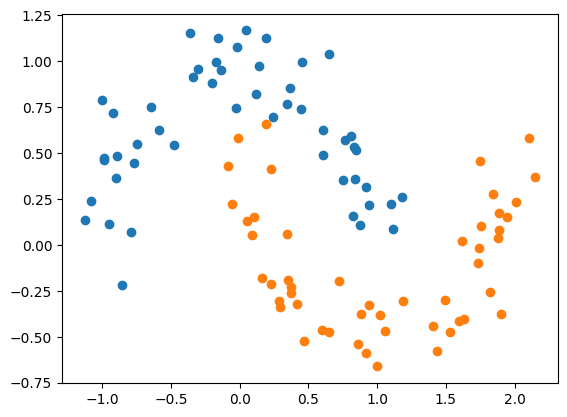

In [19]:
#Grafica el set de datos de make_moons
for class_value in range(2):
    fila_ix = np.where(y == class_value)
    #Esto serán las coordenadas 
    pyplot.scatter(X[fila_ix, 0], X[fila_ix, 1])
pyplot.show()

In [21]:
#Haz un pipeline donde aplicarás un kernel polinomial 
svm = Pipeline([
    ('scaler', StandardScaler()),
    ('SVC', SVC(kernel='poly', degree=3, C=5, coef0=1))
])

Como es un kernel polinomial, tienes que especificar el grado del mismo. 

In [23]:
#Ejecutar el pipeline
svm.fit(X,y)

,steps,"[('scaler', ...), ('SVC', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,5
,kernel,'poly'
,degree,3
,gamma,'scale'


In [24]:
#Predecir ahora con este pipeline para ver que todo marche bien
y_pred = svm.predict(X)

In [25]:
#Evaluar el clasificador con una matriz de confusión 
confusion_matrix(y, y_pred)

array([[50,  0],
       [ 1, 49]])

In [26]:
#Sacar el f1_score 
f1_score(y_pred,y)

0.98989898989899

C:\Users\Hector\AppData\Local\Temp\ipykernel_2068\3152171554.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  pyplot.scatter(X[fila_ix, 0], X[fila_ix, 1], cmap='paired')


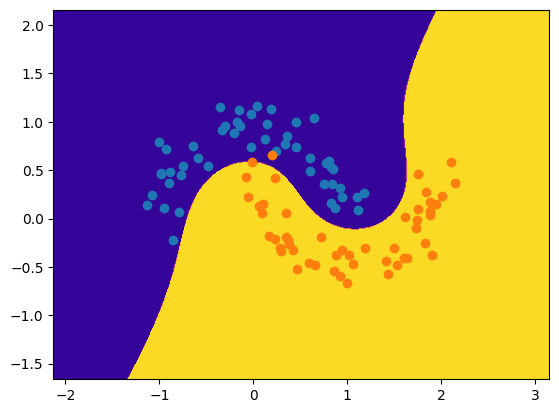

In [28]:
#Hacer la gráfica para visualizar el clasificador no lineal 
min_x1, max_x1 = X[:, 0].min() - 1, X[:, 0].max() + 1
min_x2, max_x2 = X[:, 1].min() - 1, X[:, 1].max() + 1
x1grid = np.arange(min_x1, max_x1, 0.01)
x2grid = np.arange(min_x2, max_x2, 0.01)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1,r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
svm.fit(X,y)
yhat = svm.predict(grid)
zz = yhat.reshape(xx.shape)
pyplot.contourf(xx, yy, zz, cmap='plasma')
for class_value in range(2):
    fila_ix = np.where(y == class_value)
    pyplot.scatter(X[fila_ix, 0], X[fila_ix, 1], cmap='Paired')
pyplot.show()

**Ejercicio Extra**: Varía el grado en el polinomio para evaluar la gráfica que despliega acorde al clasificador. 
Por ejemplo, grado 3.

***

#### <span style="color:blue"> 2.2 Kernel RBF Gaussiano</span>

In [29]:
#Hacer un pipeline con StandarScaler pero ahora con un Kernel RBF
svm = Pipeline([
    ('scaler', StandardScaler()),
    ('SVC', SVC(kernel='rbf', C=5, gamma=5))
])

gamma es un parámetro de regularización. **Sobreajuste**= Reducir gamma. **Subajuste**=Aumentar gamma

In [30]:
#Ejecutar el pipeline
svm.fit(X,y)

,steps,"[('scaler', ...), ('SVC', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,5
,kernel,'rbf'
,degree,3
,gamma,5


In [31]:
#Predecir ahora con este pipeline para ver que todo marche bien
y_pred = svm.predict(X)

In [32]:
#Evaluar el clasificador con una matriz de confusión 
confusion_matrix(y, y_pred)

array([[50,  0],
       [ 1, 49]])

C:\Users\Hector\AppData\Local\Temp\ipykernel_2068\590099180.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  pyplot.scatter(X[fila_ix, 0], X[fila_ix, 1], cmap='Paired')


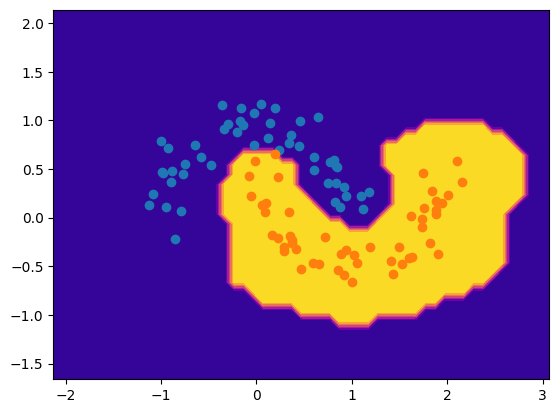

In [34]:
#Hacer la gráfica para visualizar el clasificador no lineal
min1, max1 = X[:, 0].min() - 1, X[:, 0].max() + 1
min2, max2 = X[:, 1].min() - 1, X[:, 1].max() + 1
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)
r1, r2 = xx.flatten(), yy.flatten()
r1,r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1,r2))
svm.fit(X,y)
yhat = svm.predict(grid)
zz = yhat.reshape(xx.shape)
pyplot.contourf(xx, yy, zz, cmap='plasma')
for class_value in range(2):
    fila_ix = np.where(y == class_value)
    pyplot.scatter(X[fila_ix, 0], X[fila_ix, 1], cmap='Paired')
pyplot.show()

Ejercicio: varía los hiperparametros, es decir **gamma y C**. 
Observa los resultados y analiza.

***

### <span style="color:green"> 3. Regresión con SVM</span>

#### <span style="color:blue"> 3.1 Regresión Lineal </span>

In [ ]:
#Importar SVR= Supporr Vector Regressor  
from sklearn.svm import LinearSVR 
svm = Pipeline([
    ('scaler', StandardScaler()),
    ('SVR', LinearSVR(epsilon=0.2))
])

#### <span style="color:blue"> 3.2 Regresión Polinomial </span>

In [38]:
#Tambiém se puede hacer regresiones polinomiales
from sklearn.svm import SVR
svm = Pipeline([
    ("escalar", StandardScaler()),
    ("svr", SVR(kernel="poly", degree=3,epsilon=1.5))
])